In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import scipy
from scipy import stats

In [115]:
data = pd.read_csv('data_ign/v1.0.0/v1.0.0-combined-features.csv')

In [122]:
cleaned_label = data['pattern'].unique()
df = list()
for label in cleaned_label:
    count = (data['pattern']==label).value_counts()
    total = count[0]+count[1]
    percent = count[1]/total     
    entry = {
        
        'label':[label],
        'false':[count[0]], 
        'true':[count[1]],
        'total':total,
        'percent':percent,
    }
    df.append(pd.DataFrame(data = entry))

df = pd.concat(df, ignore_index=True)
df = df.sort_values(by='true', ascending=False, ignore_index=True)
print(df)

                                                 label  false   true  total  \
0                                                 adni  26166  32804  58970   
1                   early childhood longitudinal study  56924   2046  58970   
2                     beginning postsecondary students  56975   1995  58970   
3                         education longitudinal study  57107   1863  58970   
4    trends in international mathematics and scienc...  57160   1810  58970   
..                                                 ...    ...    ...    ...   
121  rsna international covid 19 open radiology dat...  58969      1  58970   
122  national oceanic and atmospheric administratio...  58969      1  58970   
123      national weather service nws storm surge risk  58969      1  58970   
124  advanced national seismic system comprehensive...  58969      1  58970   
125    cas covid 19 antiviral candidate compounds data  58969      1  58970   

      percent  
0    0.556283  
1    0.034696  
2  

In [73]:
df.to_csv('data_ign/v1.0.0/v1.0.0-counts.csv')

[32804  2046  1995  1863  1810  1625  1303  1125  1070  1044  1039   952
   751   655   555   532   531   445   429   421   400   394   366   318
   275   274   253   244   235   203   195   181   166   161   143   140
   135   124   115   112   105   101    88    83    81    78    72    72
    64    61    54    43    42    42    41    31    28    26    23    22
    19    18    18    16    15    15    15    14    13    11    10    10
    10     9     9     9     8     8     8     7     7     7     7     7
     6     6     6     6     6     6     5     5     4     4     4     4
     3     3     3     3     3     2     2     2     2     2     2     2
     2     2     2     2     2     1     1     1     1     1     1     1
     1     1     1     1     1     1]
{'mean': 209.328, 'std': 428.15337020278133, 'upper': 637.4813702027814, 'lower': -218.82537020278133, 'count': 112}


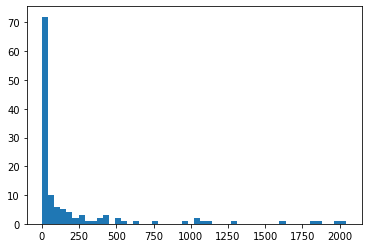

In [140]:
x = df['true'].values
print(x)
x = x[1:]
plt.hist(x, bins=50)

# print(invcdf)
x_mean = np.mean(x)
x_std = np.std(x)
upper = x_mean + 1 * x_std
lower = x_mean - 1 * x_std
x_data = [a for a in x if a > lower and a < upper]

print({
    'mean': x_mean,
    'std': x_std,
    'upper': upper,
    'lower': lower,
    'count': len(x_data)
})